#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("imdb_top_10000.txt", sep = '\t')
df.head()

tt0111161 The Shawshank Redemption (1994)  1994   9.2  619479  142 mins.  \
0  tt0110912             Pulp Fiction (1994)  1994   9.0  490065  154 mins.   
1  tt0137523               Fight Club (1999)  1999   8.8  458173  139 mins.   
2  tt0133093               The Matrix (1999)  1999   8.7  448114  136 mins.   
3  tt1375666                Inception (2010)  2010   8.9  385149  148 mins.   
4  tt0109830             Forrest Gump (1994)  1994   8.7  368994  142 mins.   

                        Crime|Drama  
0                    Crime|Thriller  
1            Drama|Mystery|Thriller  
2           Action|Adventure|Sci-Fi  
3  Action|Adventure|Sci-Fi|Thriller  
4              Comedy|Drama|Romance

In [3]:
df.isna().sum()

tt0111161                          0
The Shawshank Redemption (1994)    0
1994                               0
 9.2                               0
619479                             0
142 mins.                          0
Crime|Drama                        1
dtype: int64

In [4]:
df = pd.read_csv("imdb_top_10000.txt", sep="\t", names=['imdbID', 'title','year','score','votes','runtime','genres']) 
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [5]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [6]:
df.shape

(10000, 7)

In [7]:
df.dropna(subset=['genres'], inplace=True)
df.isna().sum()


imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

In [8]:
df.shape

(9999, 7)

In [9]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

## 2. Asking Questions

### Which movie has highest votes every year?

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [10]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [11]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [12]:
df['runtime'] = [int(runtime.split(" ")[0]) for runtime in df.runtime]
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [13]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime      int64
genres      object
dtype: object

In [14]:
genre_set = set()
for genre in df.genres:
    genre_set.update(genre.split('|')
    
                    )
    

In [15]:
len(genre_set)

24

In [16]:
for genre in genre_set:
  df[genre] = [genre in row.split("|") for row in df.genres]

In [17]:
df

imdbID                            title  year  score   votes  \
0     tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479   
1     tt0110912              Pulp Fiction (1994)  1994    9.0  490065   
2     tt0137523                Fight Club (1999)  1999    8.8  458173   
3     tt0133093                The Matrix (1999)  1999    8.7  448114   
4     tt1375666                 Inception (2010)  2010    8.9  385149   
...         ...                              ...   ...    ...     ...   
9995  tt0807721                   Meduzot (2007)  2007    7.0    1357   
9996  tt0339642            Daltry Calhoun (2005)  2005    5.2    1357   
9997  tt0060880    The Quiller Memorandum (1966)  1966    6.5    1356   
9998  tt0152836                      Taal (1999)  1999    6.5    1356   
9999  tt0279977            The Navigators (2001)  2001    6.9    1356   

      runtime                            genres  Adult  Thriller  Sci-Fi  ...  \
0         142                       Crime|Drama  False     False   False  ...   
1         154                    Crime|Thriller  False      True   False  ...   
2         139            Drama|Mystery|Thriller  False      True   False  ...   
3         136           Action|Adventure|Sci-Fi  False     False    True  ...   
4         148  Action|Adventure|Sci-Fi|Thriller  False      True    True  ...   
...       ...                               ...    ...       ...     ...  ...   
9995       78                             Drama  False     False   False  ...   
9996      100        Comedy|Drama|Music|Romance  False     False   False  ...   
9997      104            Drama|Mystery|Thriller  False      True   False  ...   
9998      179                   Musical|Romance  False     False   False  ...   
9999       96                      Comedy|Drama  False     False   False  ...   

        War  Music  Action  Animation  Adventure  Fantasy  Musical  Horror  \
0     False  False   False      False      False    False    False   False   
1     False  False   False      False      False    False    False   False   
2     False  False   False      False      False    False    False   False   
3     False  False    True      False       True    False    False   False   
4     False  False    True      False       True    False    False   False   
...     ...    ...     ...        ...        ...      ...      ...     ...   
9995  False  False   False      False      False    False    False   False   
9996  False   True   False      False      False    False    False   False   
9997  False  False   False      False      False    False    False   False   
9998  False  False   False      False      False    False     True   False   
9999  False  False   False      False      False    False    False   False   

      Sport  Reality-TV  
0     False       False  
1     False       False  
2     False       False  
3     False       False  
4     False       False  
...     ...         ...  
9995  False       False  
9996  False       False  
9997  False       False  
9998  False       False  
9999  False       False  

[9999 rows x 31 columns]

In [18]:
df.drop(['genres'], axis=1 ,inplace = True)

In [19]:
df['title'] = [t[0:-7] for t in df.title]
df

imdbID                     title  year  score   votes  runtime  \
0     tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1     tt0110912              Pulp Fiction  1994    9.0  490065      154   
2     tt0137523                Fight Club  1999    8.8  458173      139   
3     tt0133093                The Matrix  1999    8.7  448114      136   
4     tt1375666                 Inception  2010    8.9  385149      148   
...         ...                       ...   ...    ...     ...      ...   
9995  tt0807721                   Meduzot  2007    7.0    1357       78   
9996  tt0339642            Daltry Calhoun  2005    5.2    1357      100   
9997  tt0060880    The Quiller Memorandum  1966    6.5    1356      104   
9998  tt0152836                      Taal  1999    6.5    1356      179   
9999  tt0279977            The Navigators  2001    6.9    1356       96   

      Adult  Thriller  Sci-Fi  History  ...    War  Music  Action  Animation  \
0     False     False   False    False  ...  False  False   False      False   
1     False      True   False    False  ...  False  False   False      False   
2     False      True   False    False  ...  False  False   False      False   
3     False     False    True    False  ...  False  False    True      False   
4     False      True    True    False  ...  False  False    True      False   
...     ...       ...     ...      ...  ...    ...    ...     ...        ...   
9995  False     False   False    False  ...  False  False   False      False   
9996  False     False   False    False  ...  False   True   False      False   
9997  False      True   False    False  ...  False  False   False      False   
9998  False     False   False    False  ...  False  False   False      False   
9999  False     False   False    False  ...  False  False   False      False   

      Adventure  Fantasy  Musical  Horror  Sport  Reality-TV  
0         False    False    False   False  False       False  
1         False    False    False   False  False       False  
2         False    False    False   False  False       False  
3          True    False    False   False  False       False  
4          True    False    False   False  False       False  
...         ...      ...      ...     ...    ...         ...  
9995      False    False    False   False  False       False  
9996      False    False    False   False  False       False  
9997      False    False    False   False  False       False  
9998      False    False     True   False  False       False  
9999      False    False    False   False  False       False  

[9999 rows x 30 columns]

## 4. EDA

## 5. Determining Best Movies

In [20]:
for year, subset in df.groupby('year'):
    bestmovie = subset[subset.votes == subset.votes.max()]
    if bestmovie.shape[0] >1:
        print(year, bestmovie.title.values, bestmovie.votes.values)
    else:
        print(year, bestmovie.title.values[0],bestmovie.votes.values[0])

1950 Sunset Blvd. 64363
1951 Strangers on a Train 40104
1952 Singin' in the Rain 63655
1953 Roman Holiday 36760
1954 Rear Window 137663
1955 Rebel Without a Cause 30491
1956 The Searchers 32502
1957 12 Angry Men 148155
1958 Vertigo 105551
1959 North by Northwest 106359
1960 Psycho 168286
1961 Breakfast at Tiffany's 42114
1962 To Kill a Mockingbird 93918
1963 The Great Escape 71612
1964 Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb 174723
1965 The Sound of Music 59234
1966 The Good, the Bad and the Ugly 195238
1967 The Graduate 90251
1968 2001: A Space Odyssey 183207
1969 Butch Cassidy and the Sundance Kid 66419
1970 Patton 44788
1971 A Clockwork Orange 225495
1972 The Godfather 474189
1973 The Exorcist 124786
1974 The Godfather: Part II 291169
1975 One Flew Over the Cuckoo's Nest 255503
1976 Taxi Driver 186983
1977 Star Wars: Episode IV - A New Hope 364211
1978 The Deer Hunter 101624
1979 Alien 209880
1980 Star Wars: Episode V - The Empire Strikes Back 320105
198

## 6. Trends in Popularity of Genres

In [21]:
genredf = df[list(genre_set)]
genredf

Adult  Thriller  Sci-Fi  History   News  Romance  Western  Mystery  \
0     False     False   False    False  False    False    False    False   
1     False      True   False    False  False    False    False    False   
2     False      True   False    False  False    False    False     True   
3     False     False    True    False  False    False    False    False   
4     False      True    True    False  False    False    False    False   
...     ...       ...     ...      ...    ...      ...      ...      ...   
9995  False     False   False    False  False    False    False    False   
9996  False     False   False    False  False     True    False    False   
9997  False      True   False    False  False    False    False     True   
9998  False     False   False    False  False     True    False    False   
9999  False     False   False    False  False    False    False    False   

      Drama  Comedy  ...    War  Music  Action  Animation  Adventure  Fantasy  \
0      True   False  ...  False  False   False      False      False    False   
1     False   False  ...  False  False   False      False      False    False   
2      True   False  ...  False  False   False      False      False    False   
3     False   False  ...  False  False    True      False       True    False   
4     False   False  ...  False  False    True      False       True    False   
...     ...     ...  ...    ...    ...     ...        ...        ...      ...   
9995   True   False  ...  False  False   False      False      False    False   
9996   True    True  ...  False   True   False      False      False    False   
9997   True   False  ...  False  False   False      False      False    False   
9998  False   False  ...  False  False   False      False      False    False   
9999   True    True  ...  False  False   False      False      False    False   

      Musical  Horror  Sport  Reality-TV  
0       False   False  False       False  
1       False   False  False       False  
2       False   False  False       False  
3       False   False  False       False  
4       False   False  False       False  
...       ...     ...    ...         ...  
9995    False   False  False       False  
9996    False   False  False       False  
9997    False   False  False       False  
9998     True   False  False       False  
9999    False   False  False       False  

[9999 rows x 24 columns]

In [22]:
genredf.sum()

Adult            9
Thriller      2832
Sci-Fi         897
History        358
News             1
Romance       2441
Western        235
Mystery       1009
Drama         5697
Comedy        3922
Film-Noir       40
Family         754
Crime         1867
Biography      394
War            512
Music          371
Action        1891
Animation      314
Adventure     1313
Fantasy        916
Musical        260
Horror        1215
Sport          288
Reality-TV       1
dtype: int64

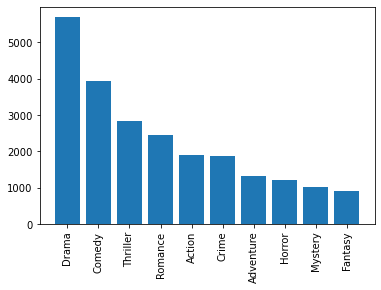

In [23]:
y = genredf.sum().sort_values(ascending=False)[:10]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90) #to display the graph in 90 degree
plt.show()